# Aula 04 - Exploração e Visualização

Uma parte fundamental do kit de ferramentas do cientista de dados é a visualização de dados. Embora seja muito fácil criar visualizações, é muito mais difícil produzir boas visualizações.

Existem dois usos principais para visualização de dados:

    Para explorar dados;
    Para comunicar dados.

Nesta aula, nos concentraremos em desenvolver as habilidades que você precisará para começar a explorar os seus próprios dados e produzir as visualizações que usaremos ao longo do curso.

Como a maioria dos tópicos que veremos, a visualização de dados é um rico campo de estudo que merece o seu próprio curso.

No entanto, vamos tentar dar uma ideia do que contribui para uma boa visualização e o que não contribui.


## Objetivos

1. Aprender Matplotlib
2. Aprender conceitos básicos de visualizar dados
3. Um pouco mais de filtro e seleção de dados

## Resultado Esperado

1. Junto com a aula passada, ferramentas simples para exploração de dados
1. Muito pode ser feito sem modelos (lembre do John-Snow Experiment)
1. Plots + Filtros!

In [1]:
# -*- coding: utf8

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.ion()

## EDA

Vamos iniciar explorando algumas chamadas sobre como fazer merge e tratar missing data. Alguns passos simples para
a Limpeza de Dados.

In [2]:
people = pd.DataFrame(
    [["Joey",      "blue",       42,  "M"],
     ["Weiwei",    "blue",       50,  "F"],
     ["Joey",      "green",       8,  "M"],
     ["Karina",    "green",  np.nan,  "F"],
     ["Fernando",  "pink",        9,  "M"],
     ["Nhi",       "blue",        3,  "F"],
     ["Sam",       "pink",   np.nan,  "M"]], 
    columns = ["Name", "Color", "Age", "Gender"])
people

,Name,Color,Age,Gender
0,Joey,blue,42.0,M
1,Weiwei,blue,50.0,F
2,Joey,green,8.0,M
3,Karina,green,NaN,F
4,Fernando,pink,9.0,M
5,Nhi,blue,3.0,F
6,Sam,pink,NaN,M


In [3]:
email = pd.DataFrame(
    [["Deb",  "deborah_nolan@berkeley.edu"],
     ["Sam",  np.nan],
     ["John", "doe@nope.com"],
     ["Joey", "jegonzal@cs.berkeley.edu"],
     ["Weiwei", "weiwzhang@berkeley.edu"],
     ["Weiwei", np.nan],
     ["Karina", "kgoot@berkeley.edu"]], 
    columns = ["User Name", "Email"])
email

,User Name,Email
0,Deb,deborah_nolan@berkeley.edu
1,Sam,NaN
2,John,doe@nope.com
3,Joey,jegonzal@cs.berkeley.edu
4,Weiwei,weiwzhang@berkeley.edu
5,Weiwei,NaN
6,Karina,kgoot@berkeley.edu


In [4]:
people.merge(email, 
             how = "inner",
             left_on = "Name", right_on = "User Name")

,Name,Color,Age,Gender,User Name,Email
0,Joey,blue,42.0,M,Joey,jegonzal@cs.berkeley.edu
1,Joey,green,8.0,M,Joey,jegonzal@cs.berkeley.edu
2,Weiwei,blue,50.0,F,Weiwei,weiwzhang@berkeley.edu
3,Weiwei,blue,50.0,F,Weiwei,NaN
4,Karina,green,NaN,F,Karina,kgoot@berkeley.edu
5,Sam,pink,NaN,M,Sam,NaN


Como podemos tratar?

1. Missing data nas cores?
2. Missing data nos e-mails?

In [5]:
people['Age'] = people['Age'].fillna(people['Age'].mean())
people

,Name,Color,Age,Gender
0,Joey,blue,42.0,M
1,Weiwei,blue,50.0,F
2,Joey,green,8.0,M
3,Karina,green,22.4,F
4,Fernando,pink,9.0,M
5,Nhi,blue,3.0,F
6,Sam,pink,22.4,M


In [6]:
email.dropna()

,User Name,Email
0,Deb,deborah_nolan@berkeley.edu
2,John,doe@nope.com
3,Joey,jegonzal@cs.berkeley.edu
4,Weiwei,weiwzhang@berkeley.edu
6,Karina,kgoot@berkeley.edu


Voltando para os dados de nomes.

In [7]:
df = pd.read_csv('baby.csv')
df

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
5,6,Elsie,1910,F,AK,6
6,7,Lucy,1910,F,AK,6
7,8,Dorothy,1910,F,AK,5
8,9,Mary,1911,F,AK,12
9,10,Margaret,1911,F,AK,7


In [8]:
cols = ['Year', 'Count']
df[cols]

,Year,Count
0,1910,14
1,1910,12
2,1910,10
3,1910,8
4,1910,7
5,1910,6
6,1910,6
7,1910,5
8,1911,12
9,1911,7


In [9]:
df[cols].groupby('Year').sum()

,Count
Year,
1910,516318
1911,565810
1912,887984
1913,1028553
1914,1293322
1915,1690022
1916,1786510
1917,1855696
1918,2013381


In [10]:
series = df[cols].groupby('Year').sum()

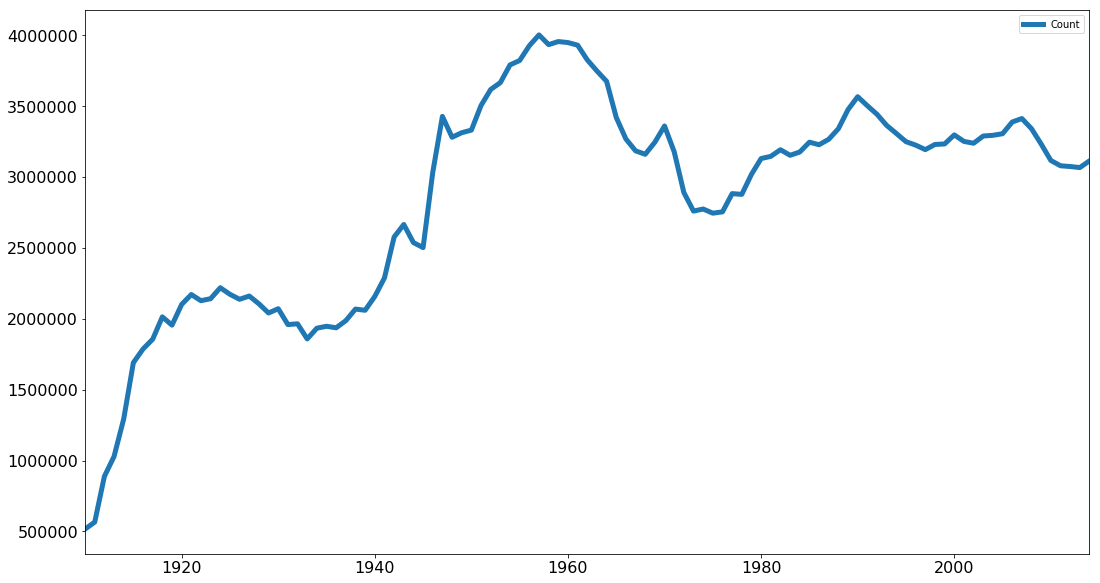

In [11]:
series.plot(figsize=(18, 10), fontsize=16, lw=5)
plt.xlabel('')

Pequena gambiarra abaixo, vou colocar cada ano no formato 1-1-ANO. Assim o pandas sabe criar uma data.

In [12]:
new_series = series.copy()
['1-1-{}'.format(str(x)) for x in new_series.index]

['1-1-1910',
 '1-1-1911',
 '1-1-1912',
 '1-1-1913',
 '1-1-1914',
 '1-1-1915',
 '1-1-1916',
 '1-1-1917',
 '1-1-1918',
 '1-1-1919',
 '1-1-1920',
 '1-1-1921',
 '1-1-1922',
 '1-1-1923',
 '1-1-1924',
 '1-1-1925',
 '1-1-1926',
 '1-1-1927',
 '1-1-1928',
 '1-1-1929',
 '1-1-1930',
 '1-1-1931',
 '1-1-1932',
 '1-1-1933',
 '1-1-1934',
 '1-1-1935',
 '1-1-1936',
 '1-1-1937',
 '1-1-1938',
 '1-1-1939',
 '1-1-1940',
 '1-1-1941',
 '1-1-1942',
 '1-1-1943',
 '1-1-1944',
 '1-1-1945',
 '1-1-1946',
 '1-1-1947',
 '1-1-1948',
 '1-1-1949',
 '1-1-1950',
 '1-1-1951',
 '1-1-1952',
 '1-1-1953',
 '1-1-1954',
 '1-1-1955',
 '1-1-1956',
 '1-1-1957',
 '1-1-1958',
 '1-1-1959',
 '1-1-1960',
 '1-1-1961',
 '1-1-1962',
 '1-1-1963',
 '1-1-1964',
 '1-1-1965',
 '1-1-1966',
 '1-1-1967',
 '1-1-1968',
 '1-1-1969',
 '1-1-1970',
 '1-1-1971',
 '1-1-1972',
 '1-1-1973',
 '1-1-1974',
 '1-1-1975',
 '1-1-1976',
 '1-1-1977',
 '1-1-1978',
 '1-1-1979',
 '1-1-1980',
 '1-1-1981',
 '1-1-1982',
 '1-1-1983',
 '1-1-1984',
 '1-1-1985',
 '1-1-1986',

Depois vou criar um novo índice

In [13]:
dates = pd.to_datetime(['15-6-{}'.format(str(x)) for x in new_series.index])
new_series.index = pd.DatetimeIndex(dates)
new_series

,Count
1910-06-15,516318
1911-06-15,565810
1912-06-15,887984
1913-06-15,1028553
1914-06-15,1293322
1915-06-15,1690022
1916-06-15,1786510
1917-06-15,1855696
1918-06-15,2013381
1919-06-15,1954834


In [14]:
new_series.resample('10Y').sum()

,Count
1910-12-31,516318
1920-12-31,15177269
1930-12-31,21345615
1940-12-31,19870213
1950-12-31,28952157
1960-12-31,38165483
1970-12-31,34817092
1980-12-31,29009332
1990-12-31,32787986
2000-12-31,33042354


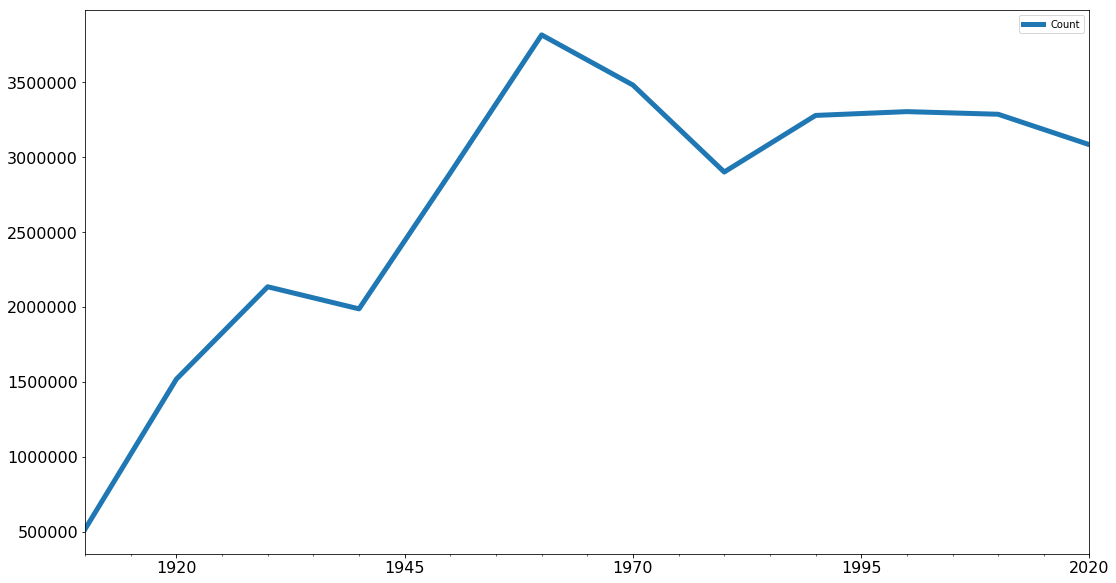

In [15]:
new_series.resample('10Y').mean().plot(figsize=(18, 10), fontsize=16, lw=5)
plt.xlabel('')

### matplotlib

Existe uma grande variedade de ferramentas para visualizar dados. 

Nós usaremos a biblioteca `matplotlib`, que é amplamente utilizada (embora mostre sua idade). 

Se você estiver interessado em produzir visualizações interativas elaboradas para a Web, provavelmente não é a escolha certa, mas para gráficos de barras simples, gráficos de linhas e diagramas de dispersão, funciona muito bem.

Em particular, estamos usando o módulo `matplotlib.pyplot`.

Em seu uso mais simples, o `pyplot` mantém um estado interno no qual você constrói uma visualização passo a passo. 

Quando terminar, você poderá salvá-lo (com `savefig()`) ou exibi-lo (com `show()`).

Vamos iniciar com duas listas simples de dados.

In [16]:
anos = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
pib = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

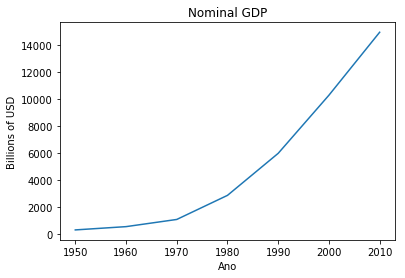

In [17]:
# cria um gráfico de linhas, com os anos no eixo x e o pib no eixo y
plt.plot(anos, pib)

# Adiciona um título
plt.title('Nominal GDP')

# Label nos eixos
plt.ylabel('Billions of USD')
plt.xlabel('Ano')

plt.show()

Podemos mudar a aparência usando estilos.

In [18]:
plt.style.use('seaborn')

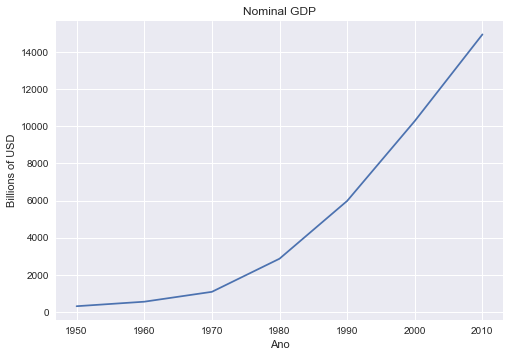

In [19]:
# cria um gráfico de linhas, com os anos no eixo x e o pib no eixo y
plt.plot(anos, pib)

# Adiciona um título
plt.title('Nominal GDP')

# Label nos eixos
plt.ylabel('Billions of USD')
plt.xlabel('Ano')

plt.show()

Em particular, eu acho bom usar os estilos colorblind. Ajudam a fazer artigos científicos e garantir que todos entendam eu plot.

In [20]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [21]:
# O comando abaixo precisa ser executada apenas uma vez, como já estamos no estilo seaborn
# o notebook deve continuar no mesmo.
# plt.style.use('seaborn-colorblind')

Podemos também usar vetores numpy sem problemas

In [22]:
x = np.linspace(-100, 100, 100) * 0.1
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

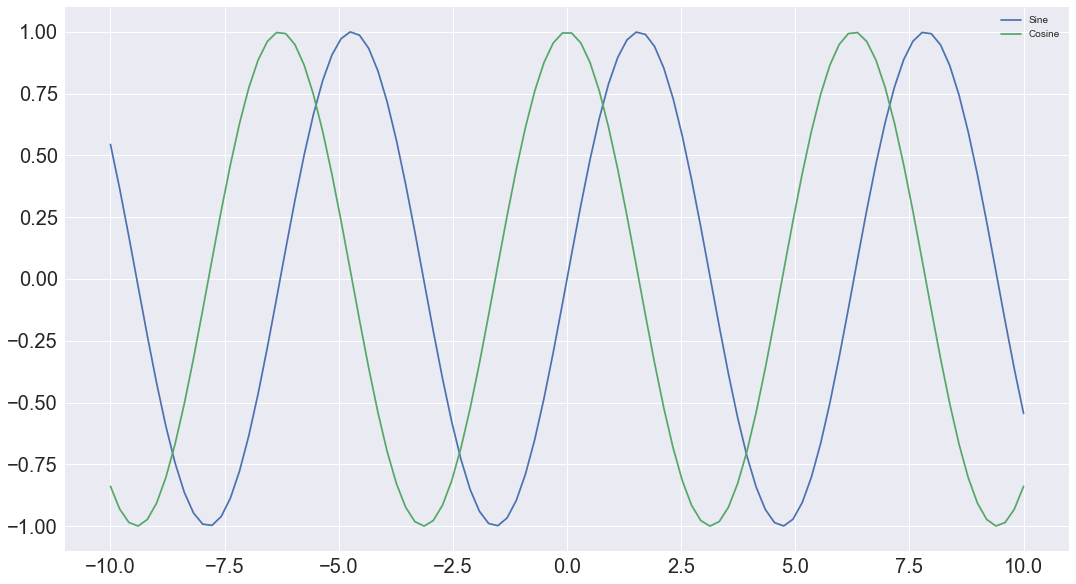

In [23]:
plt.figure(figsize=(18, 10))

plt.plot(x, np.sin(x), label='Sine')
plt.plot(x, np.cos(x), label='Cosine')
plt.legend()

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    

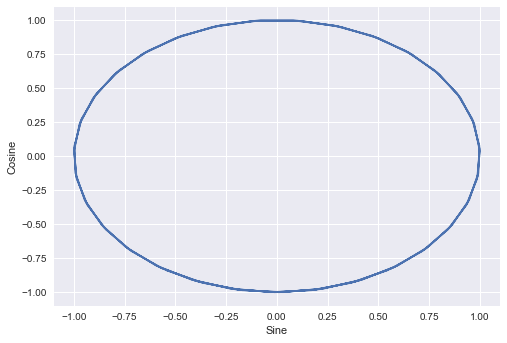

In [24]:
plt.plot(np.sin(x), np.cos(x))
plt.xlabel('Sine')
plt.ylabel('Cosine')

## Movies Dataset

Vamos olhar para mais ou menos 50 atores e algumas métricas dos filmes que os mesmos fazem parte. Em particular, vamos iniciar explorando uma forma de visualizar dados que é o histograma.

In [25]:
df = pd.read_csv('top_movies.csv')

In [26]:
df.head(6)

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008


In [27]:
mean_g.sort_values()[::-1].plot.bar()

NameError: name 'mean_g' is not defined

In [ ]:
plt.figure(figsize=(18, 10))
mean_g = df.groupby('Studio').mean()['Gross (Adjusted)']
mean_g /= 1e8
ax = mean_g.sort_values()[::-1].plot.bar(fontsize=20)
plt.ylabel('Média de Lucro em Milhões')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [ ]:
mean_g = df.groupby('Studio').mean()['Gross (Adjusted)']
mean_g /= 1e8
plt.figure(figsize=(18, 10))
plt.hist(mean_g)
plt.xlabel('Millions of Dollars')
plt.ylabel('# of Studios')

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

## Base de actors

In [ ]:
df = pd.read_csv('actors.csv')
df

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df['Average per Movie'])
plt.xlabel('Média por Filme')
plt.ylabel('Número de linhas')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df['Average per Movie'], normed=True)
plt.xlabel('Média por Filme')
plt.ylabel('P(x)')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [ ]:
plt.figure(figsize=(18, 10))
data = df['Average per Movie'][df['Average per Movie'] < 100]
plt.xlabel('Média por Filme')
plt.ylabel('P(x)')
plt.hist(data, normed=True)
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [ ]:
plt.figure(figsize=(18, 10))
data = df['Average per Movie']
plt.xlabel('Média por Filme')
plt.ylabel('P(x)')
plt.hist(data, normed=True, bins=50)
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# Problemas de escala

In [ ]:
plt.figure(figsize=(18, 10))
mentions = [500, 505]
years = [2013, 2014]

plt.bar(years, mentions)

plt.xticks(years)
plt.ylabel("# de vezes que escutei alguém dizer 'data science'")

# define o os limites do eixo y:
plt.ylim(499,506)

plt.title("Wow! Vejam que aumento!")

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [ ]:
plt.figure(figsize=(18, 10))

plt.bar(years, mentions)

plt.xticks(years)
plt.ylabel("# de vezes que escutei alguém dizer 'data science'")

plt.ylim(0, max(mentions)*1.1)
plt.title("Humm... Até que o aumento não foi tão grande.")

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# Dados 2d com e leitura de JSON

O pandas também sabe ler dados em json! Vamos tentar.

In [ ]:
df = pd.read_json('capital.json')

In [ ]:
df

In [ ]:
plt.figure(figsize=(18, 10))
plt.scatter(df['patrimonio_eleicao_1'], df['patrimonio_eleicao_2'])
linha45 = np.unique(df['patrimonio_eleicao_1'])
plt.plot(linha45, linha45)

plt.xlabel('Capital em 2014')
plt.ylabel('Capital em 2018')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)